In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('datasetRPS.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.204914,0.739529,5.984519e-07,0.284685,0.758178,-0.042691,0.362228,0.732128,-0.059598,0.423402,...,0.229531,0.425154,-0.046716,0.233463,0.374437,-0.057254,0.240546,0.329378,-0.062887,Paper
1,0.103284,0.849855,6.042106e-07,0.189504,0.866053,-0.058160,0.268983,0.838023,-0.084046,0.322602,...,0.145507,0.486695,-0.067675,0.164053,0.430134,-0.084381,0.186039,0.377575,-0.094365,Paper
2,0.203927,0.733077,6.093326e-07,0.282955,0.757666,-0.041321,0.360696,0.740055,-0.058917,0.423300,...,0.241996,0.418875,-0.049091,0.248045,0.367162,-0.059680,0.256592,0.321483,-0.065376,Paper
3,0.202714,0.723956,6.027624e-07,0.280280,0.753965,-0.042578,0.358615,0.739814,-0.060421,0.421227,...,0.247805,0.413747,-0.050200,0.255552,0.361975,-0.061528,0.265832,0.316404,-0.067592,Paper
4,0.203016,0.725136,4.992807e-07,0.279453,0.760967,-0.040346,0.359364,0.755911,-0.056068,0.425059,...,0.278265,0.414053,-0.051063,0.289591,0.363383,-0.062851,0.303990,0.318198,-0.069493,Paper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.255688,0.836404,7.856212e-07,0.314184,0.820399,-0.037197,0.360303,0.747324,-0.052475,0.366402,...,0.256787,0.625037,-0.088338,0.277782,0.689438,-0.089436,0.281682,0.739030,-0.076535,Scissor
595,0.234819,0.832914,7.566542e-07,0.295452,0.820792,-0.040804,0.340818,0.747038,-0.056508,0.341337,...,0.231165,0.618842,-0.090615,0.249940,0.686608,-0.092794,0.253605,0.736470,-0.080422,Scissor
596,0.227553,0.831989,8.160276e-07,0.288385,0.826763,-0.047410,0.336217,0.758319,-0.065474,0.334944,...,0.225743,0.619432,-0.092383,0.243877,0.691303,-0.096067,0.248750,0.742276,-0.083277,Scissor
597,0.221795,0.829124,8.347939e-07,0.284379,0.824474,-0.046089,0.331513,0.757414,-0.064067,0.327800,...,0.219503,0.611764,-0.091318,0.235659,0.682383,-0.092745,0.239981,0.733944,-0.078404,Scissor


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.204914,0.739529,5.984519e-07,0.284685,0.758178,-0.042691,0.362228,0.732128,-0.059598,0.423402,...,0.229531,0.425154,-0.046716,0.233463,0.374437,-0.057254,0.240546,0.329378,-0.062887,Paper
1,0.103284,0.849855,6.042106e-07,0.189504,0.866053,-0.058160,0.268983,0.838023,-0.084046,0.322602,...,0.145507,0.486695,-0.067675,0.164053,0.430134,-0.084381,0.186039,0.377575,-0.094365,Paper
2,0.203927,0.733077,6.093326e-07,0.282955,0.757666,-0.041321,0.360696,0.740055,-0.058917,0.423300,...,0.241996,0.418875,-0.049091,0.248045,0.367162,-0.059680,0.256592,0.321483,-0.065376,Paper
3,0.202714,0.723956,6.027624e-07,0.280280,0.753965,-0.042578,0.358615,0.739814,-0.060421,0.421227,...,0.247805,0.413747,-0.050200,0.255552,0.361975,-0.061528,0.265832,0.316404,-0.067592,Paper
4,0.203016,0.725136,4.992807e-07,0.279453,0.760967,-0.040346,0.359364,0.755911,-0.056068,0.425059,...,0.278265,0.414053,-0.051063,0.289591,0.363383,-0.062851,0.303990,0.318198,-0.069493,Paper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,0.255688,0.836404,7.856212e-07,0.314184,0.820399,-0.037197,0.360303,0.747324,-0.052475,0.366402,...,0.256787,0.625037,-0.088338,0.277782,0.689438,-0.089436,0.281682,0.739030,-0.076535,Scissor
595,0.234819,0.832914,7.566542e-07,0.295452,0.820792,-0.040804,0.340818,0.747038,-0.056508,0.341337,...,0.231165,0.618842,-0.090615,0.249940,0.686608,-0.092794,0.253605,0.736470,-0.080422,Scissor
596,0.227553,0.831989,8.160276e-07,0.288385,0.826763,-0.047410,0.336217,0.758319,-0.065474,0.334944,...,0.225743,0.619432,-0.092383,0.243877,0.691303,-0.096067,0.248750,0.742276,-0.083277,Scissor
597,0.221795,0.829124,8.347939e-07,0.284379,0.824474,-0.046089,0.331513,0.757414,-0.064067,0.327800,...,0.219503,0.611764,-0.091318,0.235659,0.682383,-0.092745,0.239981,0.733944,-0.078404,Scissor


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (599, 63)
Labels shape = (599,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['Paper', 'Paper', 'Scissor', 'Scissor', 'Rock', 'Rock', 'Rock',
       'Scissor', 'Scissor', 'Scissor', 'Scissor', 'Rock', 'Scissor',
       'Scissor', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock', 'Rock',
       'Paper', 'Rock', 'Paper', 'Rock', 'Scissor', 'Paper', 'Paper',
       'Rock', 'Scissor', 'Scissor', 'Paper', 'Rock', 'Scissor', 'Paper',
       'Scissor', 'Rock', 'Scissor', 'Rock', 'Rock', 'Rock', 'Paper',
       'Paper', 'Paper', 'Rock', 'Paper', 'Scissor', 'Scissor', 'Rock',
       'Paper', 'Scissor', 'Paper', 'Rock', 'Rock', 'Paper', 'Scissor',
       'Scissor', 'Rock', 'Paper', 'Rock', 'Rock', 'Scissor', 'Paper',
       'Scissor', 'Scissor', 'Paper', 'Paper', 'Rock', 'Paper', 'Paper',
       'Paper', 'Paper', 'Rock', 'Rock', 'Scissor', 'Rock', 'Rock',
       'Paper', 'Rock', 'Rock', 'Paper', 'Paper', 'Paper', 'Paper',
       'Scissor', 'Scissor', 'Rock', 'Scissor', 'Scissor', 'Scissor',
       'Rock', 'Scissor', 'Paper', 'Paper', 'Paper', 'Paper', 'Paper',
      

In [11]:
print(y_test)

127      Paper
48       Paper
487    Scissor
409    Scissor
225       Rock
        ...   
55       Paper
90       Paper
389       Rock
391       Rock
520    Scissor
Name: Output, Length: 120, dtype: object


In [14]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1, recall, precision, accuracy

(1.0, 1.0, 1.0, 1.0)

<AxesSubplot: title={'center': 'Confusion Matrix - Rock Paper Scissor'}>

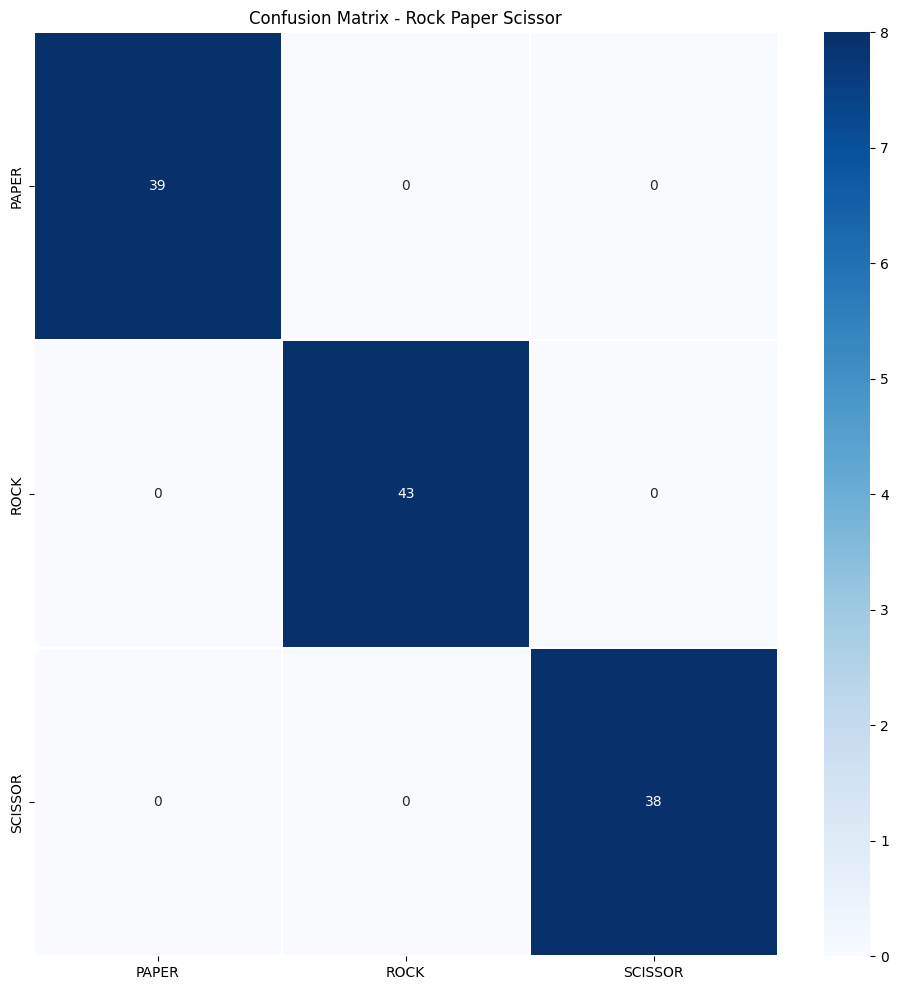

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - Rock Paper Scissor")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [9]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)